<a href="https://colab.research.google.com/github/bahiensed/ml/blob/main/04_ClassifyImageWithEfficientNetV2L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#CHANGE THIS VALUE ACCORDINGLY
#image size
#see the right value on model's documentation
IMAGE_SIZE = 480

In [ ]:
#image shape
IMAGE_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

In [ ]:
#image batch size
IMG_BATCH_SIZE = 1

In [ ]:
#number of top results to display
TOP = 15

In [ ]:
#get image (function)
def get_image_from_url(image_url):
  #if temporary test_image.jpg file already exists,
  #delete it so a new one can be made.
  if os.path.exists('/root/.keras/datasets/test_image.jpg'):
    os.remove('/root/.keras/datasets/test_image.jpg')

  image_path = tf.keras.utils.get_file('test_image.jpg', origin=image_url)
  return image_path

In [ ]:
#print classification results (function)
def print_classifications(classifications):
    for (classification, number) in zip(classifications[0], range(1, len(classifications[0])+1)):
      print('{}. {} {:.2f}%'.format(number, classification[1], classification[2]*100))

In [ ]:
#CHANGE THIS VALUE ACCORDINGLY
#load model
model = tf.keras.applications.EfficientNetV2L(input_shape=IMAGE_SHAPE)

478307632/478307632 [==============================] - 7s 0us/step


In [ ]:
#classify image (function)
def classify_image(image_url):
  #fetch image from URL using the above get image function
  image_path = get_image_from_url(image_url)

  #prepare image for use by the model
  image = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))

  #create a new figure, or activate an existing one
  #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
  plt.figure()

  #display data as an image, i.e., on a 2D regular raster.
  #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
  plt.imshow(image)

  #transform image into an array
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = np.expand_dims(image, axis=0)

  #classifying
  classification_result = model.predict(image, batch_size=IMG_BATCH_SIZE)

  # narrowing to the top n results
  classifications = tf.keras.applications.imagenet_utils.decode_predictions(classification_result, top=TOP)

  #print classifications
  print_classifications(classifications)

1/1 [==============================] - 3s 3s/step
1. Arctic_fox 80.94%
2. white_wolf 1.82%
3. grey_fox 0.27%
4. red_fox 0.23%
5. kit_fox 0.21%
6. timber_wolf 0.21%
7. ice_bear 0.17%
8. Samoyed 0.11%
9. hare 0.11%
10. snow_leopard 0.09%
11. weasel 0.07%
12. ptarmigan 0.07%
13. lynx 0.06%
14. coyote 0.06%
15. Eskimo_dog 0.06%


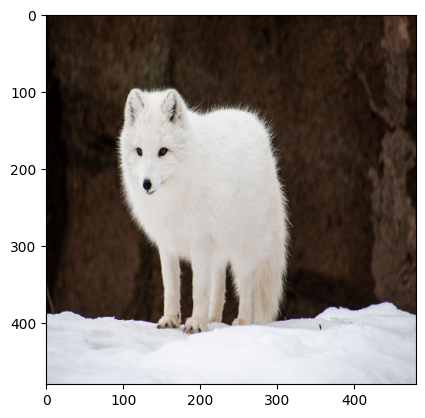

In [ ]:
#import and classify image
classify_image('https://t3.gstatic.com/licensed-image?q=tbn:ANd9GcQ1qGCMfIQ7AbRF2TqjRHXz9WbOoLPT6Wb87PGPfHU7iDC6jdoG_v0YIUxv_lKawlFa')
#classify_image('https://upload.wikimedia.org/wikipedia/commons/5/5f/Kolm%C3%A5rden_Wolf.jpg')